# Decision Tree for Iris Data
### Importing the Libs

In [1]:
!pip install plotly --upgrade

     |████████████████████████████████| 28.8 MB 65.8 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Base de dados de Iris

- Fonte (adaptado): https://www.kaggle.com/datasets/arshid/iris-flower-dataset?select=IRIS.csv

###Exploração dos Dados

In [3]:
base_Iris = pd.read_csv('/content/IRIS.csv')

In [4]:
base_Iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
base_Iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
base_Iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
base_Iris.shape

(150, 5)

### Visualização dos Dados

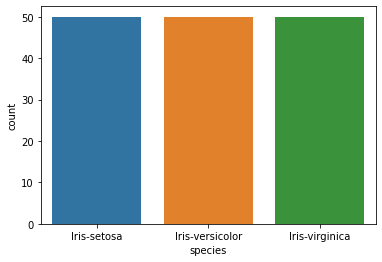

In [8]:
sns.countplot(x = base_Iris['species']);

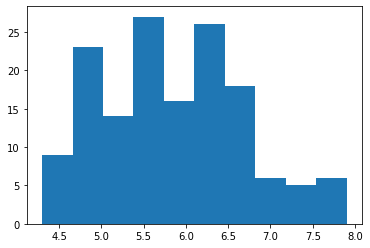

In [9]:
plt.hist(x = base_Iris['sepal_length']);

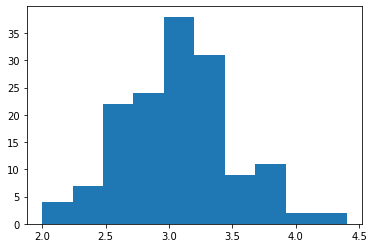

In [10]:
plt.hist(x = base_Iris['sepal_width']);

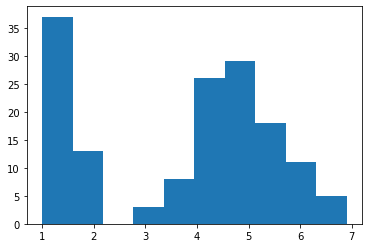

In [11]:
plt.hist(x = base_Iris['petal_length']);

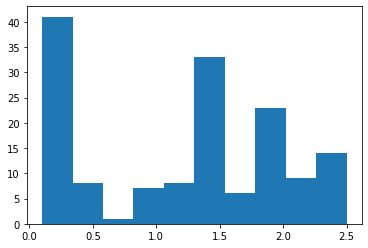

In [12]:
plt.hist(x = base_Iris['petal_width']);

In [13]:
grafico = px.scatter_matrix(base_Iris, dimensions=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], color = 'species')
grafico.show();

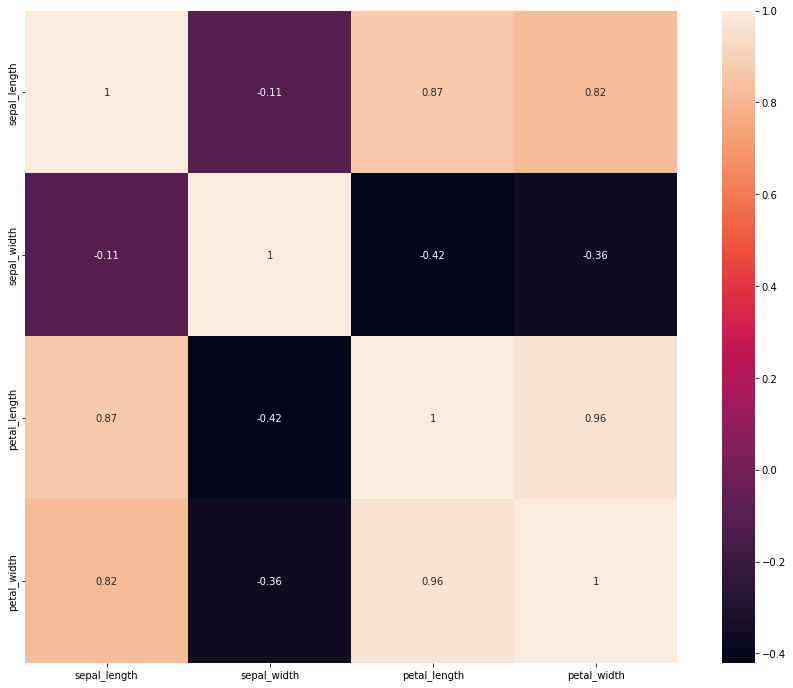

In [14]:
plt.subplots(figsize=(16,12))
sns.heatmap(
    base_Iris.corr(),
    annot=True,
    square=True,
    cbar=True
)

###Tratamento de valores faltantes

In [15]:
base_Iris.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [16]:
base_Iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

There are not missing values.

## Divisão entre previsores e classe

In [17]:
base_Iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [18]:
X_Iris = base_Iris.iloc[:, 0:4].values
X_Iris

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [19]:
Y_Iris = base_Iris.iloc[:, 4].values
Y_Iris

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

## Tratamento de atributos categóricos

### LabelEncoder

In [20]:
from sklearn.preprocessing import LabelEncoder
Y_Iris = LabelEncoder().fit_transform(Y_Iris)
Y_Iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Escalonamento dos valores

In [21]:
from sklearn.preprocessing import MinMaxScaler
X_Iris =  MinMaxScaler().fit_transform(X_Iris)
X_Iris

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

# Divisão das bases em treinamento e teste

In [22]:
from sklearn.model_selection import train_test_split
X_Iris_treinamento, X_Iris_teste, Y_Iris_treinamento, Y_Iris_teste = train_test_split(X_Iris, Y_Iris, test_size = 0.25, random_state = 0)

In [23]:
X_Iris_treinamento.shape, Y_Iris_treinamento.shape

((112, 4), (112,))

In [24]:
X_Iris_teste.shape, Y_Iris_teste.shape

((38, 4), (38,))

## Salvar as variáveis

In [25]:
import pickle
with open('iris.pkl', mode = 'wb') as f:
  pickle.dump([X_Iris_treinamento, Y_Iris_treinamento, X_Iris_teste, Y_Iris_teste], f)

##Training the Model with a Decision Tree 97,36% of precision

In [42]:
from sklearn.tree import DecisionTreeClassifier
arvore_Iris = DecisionTreeClassifier(criterion='entropy')
arvore_Iris.fit(X_Iris_treinamento, Y_Iris_treinamento)

DecisionTreeClassifier(criterion='entropy')

In [27]:
arvore_Iris.feature_importances_

array([0.01832976, 0.01832976, 0.8975234 , 0.06581707])

In [28]:
arvore_Iris.classes_

array([0, 1, 2])

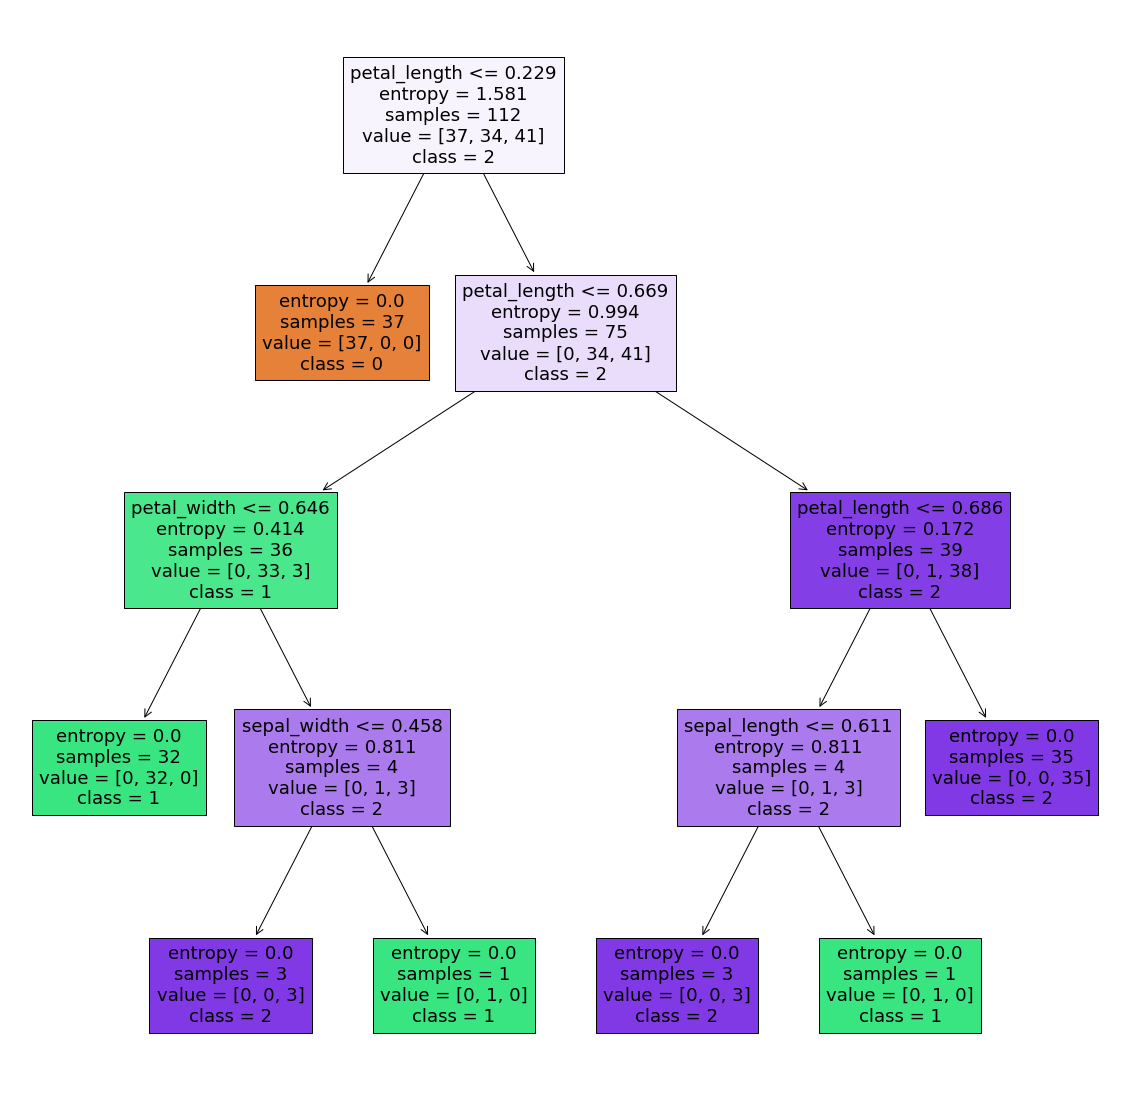

In [29]:
from sklearn import  tree
previsores = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
#figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10)).make
tree.plot_tree(arvore_Iris, feature_names=previsores, class_names = ['0','1','2'], filled=True);

In [43]:
previsoes_Iris = arvore_Iris.predict(X_Iris_teste)

In [44]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(Y_Iris_teste, previsoes_Iris)

0.9736842105263158

0.9736842105263158

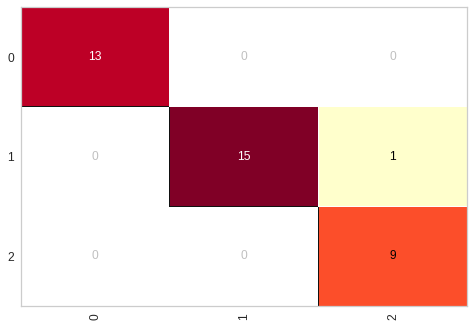

In [32]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_Iris)
cm.fit(X_Iris_treinamento, Y_Iris_treinamento)
cm.score(X_Iris_teste, Y_Iris_teste)

In [33]:
print(classification_report(Y_Iris_teste, previsoes_Iris))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

####With 2 trees 92,1%

In [71]:
random_forest_Iris2 = RandomForestClassifier(n_estimators=2, criterion='entropy', random_state = 0)
random_forest_Iris2.fit(X_Iris_treinamento, Y_Iris_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=2, random_state=0)

In [73]:
previsoes2 = random_forest_Iris2.predict(X_Iris_teste)
accuracy_score(Y_Iris_teste, previsoes2)

0.9210526315789473

#### With 5 Trees 97,36%

In [74]:
random_forest_Iris5 = RandomForestClassifier(n_estimators=5, criterion='entropy', random_state = 0)
random_forest_Iris5.fit(X_Iris_treinamento, Y_Iris_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

In [75]:
previsoes5 = random_forest_Iris5.predict(X_Iris_teste)
accuracy_score(Y_Iris_teste, previsoes5)

0.9736842105263158

#### With 100 Trees 97,36%

In [76]:
random_forest_Iris100 = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
random_forest_Iris100.fit(X_Iris_treinamento, Y_Iris_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [77]:
previsoes100 = random_forest_Iris100.predict(X_Iris_teste)
accuracy_score(Y_Iris_teste, previsoes100)

0.9736842105263158

0.9736842105263158

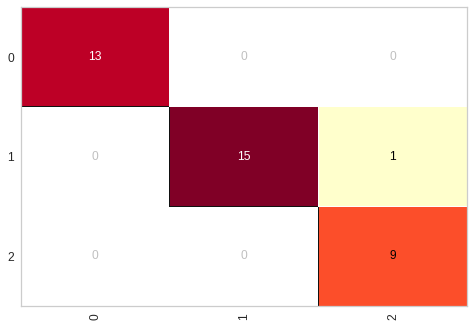

In [78]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_Iris100)
cm.fit(X_Iris_treinamento, Y_Iris_treinamento)
cm.score(X_Iris_teste, Y_Iris_teste)

In [79]:
print(classification_report(Y_Iris_teste, previsoes100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

